In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import pandas as pd
import matplotlib.colors as colors

from sys import path
path.insert(0, "../../../../free-fermions/lib")
import geometry as geom
import fibonacci_hamiltonian as ham
import eigenstate as eigen

In [167]:
len(ham.FiboSeq(14)) % 2

0

In [218]:
def diagonalize(n, rho, h):
    """
    n: number of Fibonacci iterations
    h: strength of on-site potentials
    """
    seq = ham.FiboSeq(n)
    L = len(seq)
    # circular permutation for nicer real space dependance
    seq = np.roll(seq, 1)
    H = ham.ham(seq, rho, -h, periodic=False)
    return np.linalg.eigh(H)

def plot_density(ax, wf, zorder, **kwargs):
    """
    wf: a wavefunction
    will plot: the density (ie wavefunction squared)
    """
    pos = range(len(wf))
    density = np.around(wf**2., decimals=5)
    #density = wf**2.
    p = ax.plot(density, **kwargs, zorder=zorder)
    # retrieve the color of the plot
    color = p[0].get_color()
    ax.fill_between(pos, density, where=density>=0, interpolate=False, color=color, lw=0.8, zorder=zorder)

BostonBlue = [0.2306, 0.5312, 0.6797]
Tuscany = [0.6797, 0.3789, 0.2305]

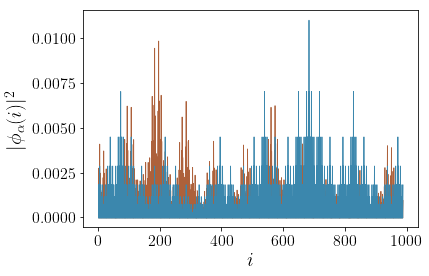

In [258]:
with plt.style.context('article-twocolumns'):
    n = 15
    h = 0
    rho = 0.8
    en, psi = diagonalize(n, rho, h)
    N = len(en)
    indices = [N//2-17, N//2]
    colors = [Tuscany, BostonBlue]
    # round density to prevent seeing noise in log scale
    fig, ax = plt.subplots()
    for i, (color, index) in enumerate(zip(colors, indices)):
        plot_density(ax, psi[:,index], 2*i, marker="", markersize=3, color=color, lw=0)
    #ax.set_yscale('log', nonposy='clip')
    plt.xlabel("$i$")
    plt.ylabel(r"$|\phi_\alpha(i)|^2$")
    plt.grid(0)
    plt.savefig(f'free_two_densities.svg')
    plt.show()


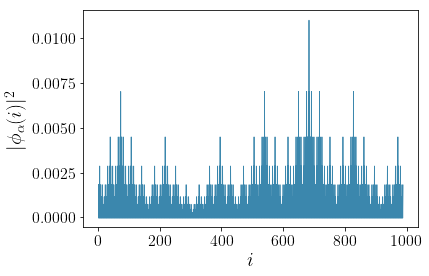

In [257]:
with plt.style.context('article-twocolumns'):
    n = 15
    h = 0
    rho = 0.8
    en, psi = diagonalize(n, rho, h)
    N = len(en)
    indices = [N//2]
    colors = [BostonBlue]
    # round density to prevent seeing noise in log scale
    fig, ax = plt.subplots()
    for i, (color, index) in enumerate(zip(colors, indices)):
        plot_density(ax, psi[:,index], 2*i, marker="", markersize=3, color=color, lw=0)
    #ax.set_yscale('log', nonposy='clip')
    plt.xlabel("$i$")
    plt.ylabel(r"$|\phi_\alpha(i)|^2$")
    plt.grid(0)
    plt.savefig(f'one_density.svg')
    plt.show()
